In [12]:
import numpy as np

In [13]:
nums = np.random.uniform(-10, 10, 100)

# nums = np.linspace(0,10,200)
# nums = np.concatenate((nums,np.linspace(50,100,100)))
nums = np.sort(nums)
nums

array([-9.88422912, -9.85645225, -9.71356599, -9.45520554, -9.40254037,
       -7.80302277, -7.54146146, -7.51668383, -7.38735657, -7.17593743,
       -7.0853532 , -7.06835411, -6.96204069, -6.75494713, -6.19366329,
       -6.07658024, -6.07327104, -5.79943264, -5.76878836, -5.72182145,
       -5.68997374, -5.18393741, -5.12886683, -4.96948738, -4.91806399,
       -4.69597339, -4.5816033 , -4.52728603, -4.33075161, -4.07703358,
       -3.92175476, -3.60715979, -3.15753743, -3.06232473, -2.37101786,
       -2.24249704, -2.22887604, -1.70640781, -1.62964547, -1.46812635,
       -1.12524014, -0.72749231, -0.72587471, -0.44498741, -0.40008492,
       -0.1622596 , -0.03426697,  0.25382577,  0.26667249,  0.53817341,
        0.74264596,  0.82445602,  0.8423776 ,  0.8818589 ,  0.99591127,
        1.33015891,  1.41841869,  1.44249853,  1.49326894,  1.61665551,
        1.76933608,  1.91596288,  2.11896335,  2.1651473 ,  2.29463709,
        3.03896224,  3.58941358,  3.64173144,  3.96001686,  4.60

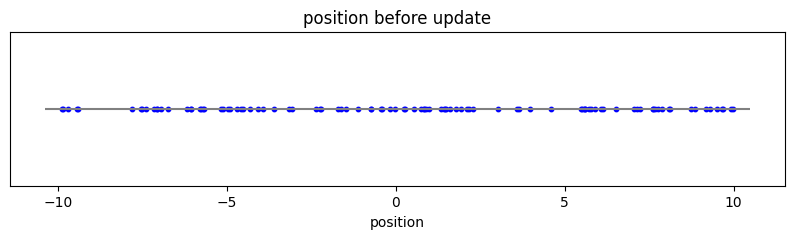

In [14]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num-0.5, max_num+0.5, colors='gray', linestyles='solid')

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums, np.ones_like(nums), color='b', s=10)

plt.title('position before update')
plt.xlabel('position')
plt.yticks([])
plt.show()

In [15]:
# from scipy.stats import norm
# 
# dens = []
# 
# for num in nums:
#     sum_p = 0
#     # 여기에 가우시안 넣어야 될듯
#     for num2 in nums:
#         if num != num2:
#             # gaussian 커널로 점들간 거리에 따라 확률추정
#             p = norm.pdf(num-num2, 0, 1)
#             # 점 num에서 확률추정
#             sum_p += p
# 
#     dens.append(sum_p / (len(nums)-1))
# 
# dens /= np.sum(dens)
#   
# plt.xlim([min_num-0.5, max_num+0.5])
# # plt.scatter(nums, dens, s=1)
# plt.plot(nums, dens)

이제 점을 옮겨야지
옮기려ㅈ면 기준 점에서 나머지 점들을 빼서 벡터를 만들고
그 벡터를 모드 더하면 어떻게든 하나의 방향이 나올거야
그 방향의 반대 방향으로 이동시키면

In [16]:
from scipy.stats import norm

count = 0

dens = np.zeros(len(nums))
vec = np.zeros(len(nums))

while count < 100:
        
    for i in range(len(nums)):
        sum_pdf = 0
        vec_total = 0
        # 여기에 가우시안 넣어야 될듯
        for num2 in nums:
            # 적용할 때는 먼저 점들을 떨어뜨리기 때문에 상관은 없으나,
            # 다른 방식으로 적용하려면 인덱스로 비교해야합니다.
            if nums[i] != num2:
                # gaussian 커널로 점들간 거리에 따라 확률추정
                # 이게 벡터의 크기
                p = norm.pdf(nums[i]-num2, 0, 1)
                # 점 num에서 확률추정
                sum_pdf += p
                vec_total += p * (nums[i]-num2)
            
        dens[i] = sum_pdf/(len(nums)-1)
        vec[i] = vec_total
        # dens.append(sum_pdf / (len(nums)-1))
        # vec.append(vec_total)
    
    dens /= np.sum(dens)
    nums += vec
    count += 1

In [17]:
# from scipy.stats import norm
# 
# def filter_with_pdf(nums):
#     count = 0
#     
#     dens = np.zeros(len(nums))
#     vec = np.zeros(len(nums))
#     
#     while count < 500:
#             
#         for i in range(len(nums)):
#             sum_pdf = 0
#             vec_total = 0
#             # 여기에 가우시안 넣어야 될듯
#             for num2 in nums:
#                 if nums[i] != num2:
#                     # gaussian 커널로 점들간 거리에 따라 확률추정
#                     # 이게 벡터의 크기
#                     p = norm.pdf(nums[i]-num2, 0, 1)
#                     # 점 num에서 확률추정
#                     sum_pdf += p
#                     vec_total += p * (nums[i]-num2)
#                 
#             dens[i] = sum_pdf/(len(nums)-1)
#             vec[i] = vec_total
#             # dens.append(sum_pdf / (len(nums)-1))
#             # vec.append(vec_total)
#         
#         dens /= np.sum(dens)
#         nums += vec
#         count += 1
#     return nums

In [18]:
## 지금 dens랑 num이랑 sort할 때 대응하여 정렬
nums_sorted = np.sort(nums)
index = np.argsort(nums)

dens_sorted = [dens[i] for i in index]

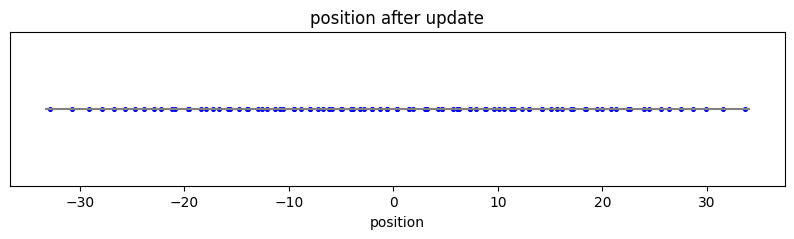

In [19]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num-0.5, max_num+0.5, colors='gray', linestyles='solid')

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums_sorted, np.ones_like(nums), color='b', s=7)

plt.title('position after update')
plt.xlabel('position')
plt.yticks([])
plt.show()

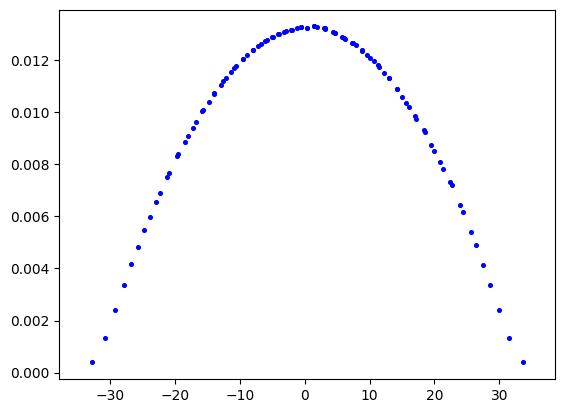

In [32]:
plt.xlim([min_num-5, max_num+5])
# plt.ylim([0, 0.05])
# plt.scatter(nums, dens, s=1)
# plt.plot(nums_sorted, dens_sorted)
plt.scatter(nums, dens, color='b', s=7)